In [185]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [186]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 140
max_generation = 150

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [187]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000140, 1 / 11 ...
reading generation_0000141, 2 / 11 ...
reading generation_0000142, 3 / 11 ...
reading generation_0000143, 4 / 11 ...
reading generation_0000144, 5 / 11 ...
reading generation_0000145, 6 / 11 ...
reading generation_0000146, 7 / 11 ...
reading generation_0000147, 8 / 11 ...
reading generation_0000148, 9 / 11 ...
reading generation_0000149, 10 / 11 ...
reading generation_0000150, 11 / 11 ...


In [188]:
life_span_df.sort_values(by="median_life_span")

,generation,fish_name,mean_life_span,median_life_span,is_from_last_geneartion
4867,144,fish_241220_10_52_09.251348,35.5,3.0,False
10937,150,fish_241220_11_51_32.098629,5.9,3.5,False
877,140,fish_241220_10_19_54.620044,21.7,4.0,False
8815,148,fish_241220_11_30_43.301139,67.5,4.5,False
10784,150,fish_241220_11_51_24.533042,173.1,4.5,False
...,...,...,...,...,...
8537,148,fish_241220_11_30_29.722296,1264.4,1000.0,False
113,140,fish_241220_10_19_22.775894,1000.0,1000.0,False
8586,148,fish_241220_11_30_31.880411,1018.4,1000.0,False
8597,148,fish_241220_11_30_32.435270,1000.0,1000.0,False


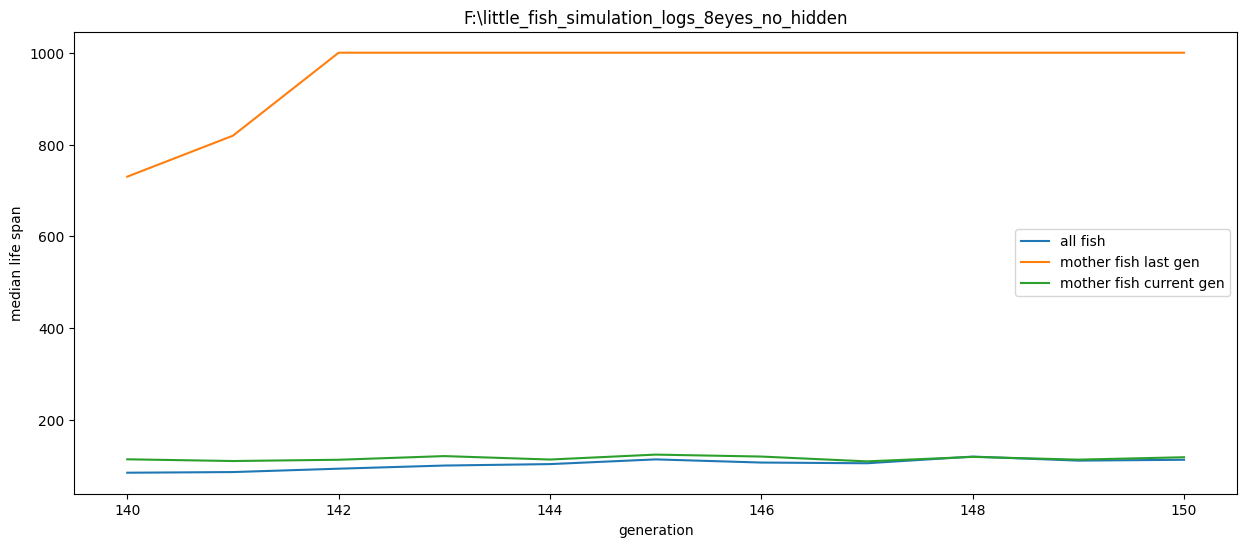

In [189]:
gens = sorted(life_span_df["generation"].unique())
median_life_span = []
median_mo_life_last_gen = []
median_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["median_life_span"])
    median_life_span.append(np.mean(curr_life_span))
    median_mo_life_last_gen.append(np.median(life_span_df.query("generation == @gen and is_from_last_geneartion")["median_life_span"]))
    median_mo_life_curr_gen.append(np.median(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, median_life_span, label="all fish")
ax.plot(gens, median_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, median_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("median life span")
ax.set_title(simulation_folder)
ax.legend()

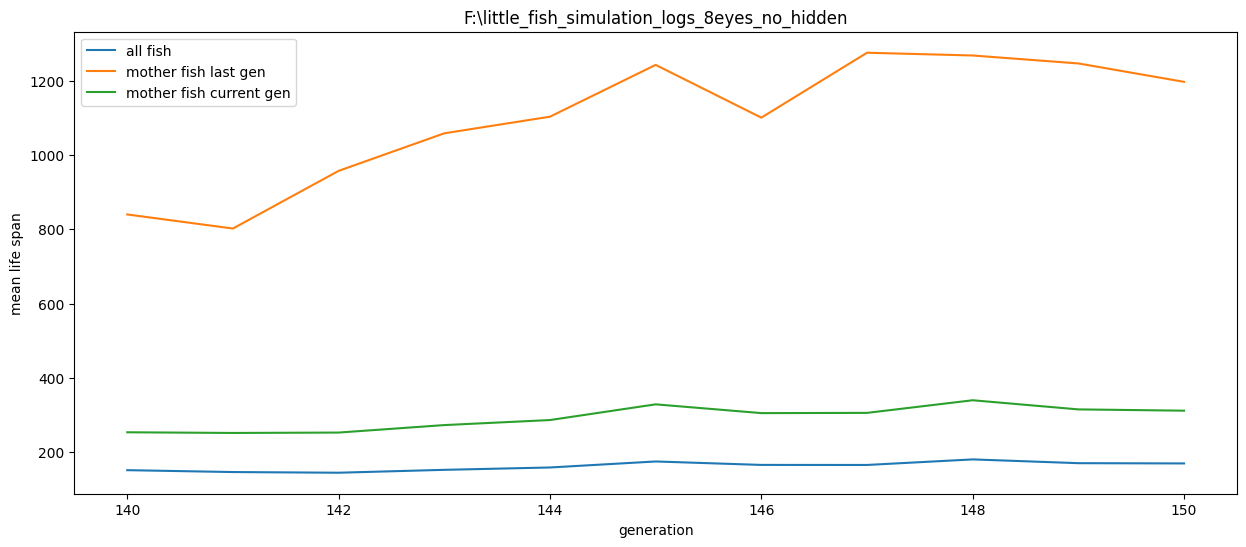

In [190]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["mean_life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["mean_life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 6000.0)

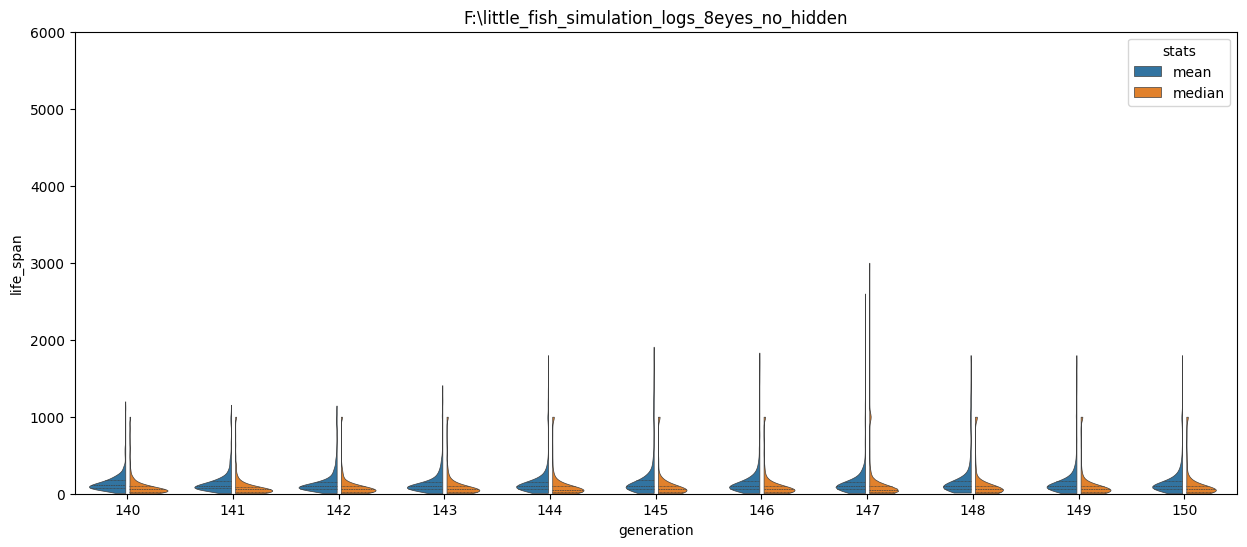

In [191]:
mean_df = life_span_df[["generation", "fish_name", "mean_life_span", "is_from_last_geneartion"]]
mean_df["stats"] = "mean"
mean_df.rename(columns={"mean_life_span": "life_span"}, inplace=True)

median_df = life_span_df[["generation", "fish_name", "median_life_span", "is_from_last_geneartion"]]
median_df["stats"] = "median"
median_df.rename(columns={"median_life_span": "life_span"}, inplace=True)

plot_df = pd.concat([mean_df, median_df]).reset_index(drop=True)

# print(plot_df)

f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=plot_df, x="generation", y="life_span", hue="stats", split=True, ax=ax, cut=0, linewidth=0.5, inner="quart", gap=0.1
)
ax.set_ylim([0, 6000])